# RNN "Many-2-Many" use-case. 

## Run sequences based on words.

### Dataset layout

#### Window 0:

```python
Sample: "Hello,world and ML"
Label: "world and ML"
```

#### Window 1:
```python
Sample: "world and ML"
Label: "and ML"
```

......


In [14]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GRU, Conv1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential

import numpy as np 
import pprint as pp


# Load and clean data

In [15]:

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data = data.replace("\n", "")
print(data)

In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. His father died and made him a man again  Left him a farm and ten acres of ground. He gave a grand party for friends and relations Who didnt forget him when come to the wall, And if youll but listen Ill make your eyes glisten Of the rows and the ructions of Lanigans Ball. Myself to be sure got free invitation, For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask. Judy ODaly, that nice little milliner, She tipped me a wink for to give her a call, And I soon arrived with Peggy McGilligan Just in time for Lanigans Ball. There were lashings of punch and wine for the ladies, Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, OGradys Courting the girls and dancing away. Songs they went round as plenty as water, The harp that once sounded in Taras old hall,Sweet Nelly Gray and The Rat Catchers Daughter,All si

## Convert to corpus

In [16]:
corpus=[data]
print(corpus)


['In the town of Athy one Jeremy Lanigan  Battered away til he hadnt a pound. His father died and made him a man again  Left him a farm and ten acres of ground. He gave a grand party for friends and relations Who didnt forget him when come to the wall, And if youll but listen Ill make your eyes glisten Of the rows and the ructions of Lanigans Ball. Myself to be sure got free invitation, For all the nice girls and boys I might ask, And just in a minute both friends and relations Were dancing round merry as bees round a cask. Judy ODaly, that nice little milliner, She tipped me a wink for to give her a call, And I soon arrived with Peggy McGilligan Just in time for Lanigans Ball. There were lashings of punch and wine for the ladies, Potatoes and cakes; there was bacon and tea, There were the Nolans, Dolans, OGradys Courting the girls and dancing away. Songs they went round as plenty as water, The harp that once sounded in Taras old hall,Sweet Nelly Gray and The Rat Catchers Daughter,All 

# Create Tokenizer and sequences

## Tokenizer

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


print(total_words) 
print(tokenizer.word_index)


263
{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'gra

### Sequences

In [18]:
input_sequences = tokenizer.texts_to_sequences(corpus)
input_sequences = input_sequences[0]
print(input_sequences)


[4, 2, 66, 8, 67, 68, 69, 70, 71, 40, 20, 21, 72, 3, 73, 16, 74, 75, 1, 76, 33, 3, 77, 22, 41, 33, 3, 78, 1, 79, 80, 8, 81, 21, 82, 3, 83, 84, 7, 42, 1, 43, 85, 86, 87, 33, 44, 88, 13, 2, 45, 1, 89, 90, 91, 92, 93, 94, 95, 96, 97, 8, 2, 98, 1, 2, 99, 8, 9, 10, 46, 13, 100, 101, 23, 102, 103, 7, 5, 2, 47, 17, 1, 24, 6, 104, 105, 1, 48, 4, 3, 106, 107, 42, 1, 43, 11, 49, 25, 50, 18, 108, 25, 3, 109, 110, 111, 26, 47, 112, 113, 14, 51, 52, 3, 114, 7, 13, 115, 27, 3, 116, 1, 6, 53, 117, 118, 119, 120, 48, 4, 54, 7, 9, 10, 28, 11, 121, 8, 122, 1, 123, 7, 2, 124, 125, 1, 126, 28, 34, 127, 1, 128, 28, 11, 2, 129, 130, 131, 132, 2, 17, 1, 49, 40, 133, 19, 134, 25, 18, 135, 18, 136, 2, 137, 26, 138, 139, 4, 140, 55, 141, 142, 143, 144, 1, 2, 145, 146, 147, 5, 148, 149, 12, 9, 10, 19, 11, 150, 5, 151, 8, 152, 153, 5, 25, 2, 154, 4, 3, 155, 156, 1, 6, 157, 158, 56, 159, 1, 51, 57, 2, 160, 8, 3, 161, 1, 3, 162, 163, 164, 165, 2, 17, 23, 5, 166, 12, 52, 58, 20, 167, 168, 2, 169, 170, 171, 7, 6, 35,

# Create dataset

In [19]:
window_size = 11
batch_size = 1 
 
input_sequences = tf.expand_dims(input_sequences, axis=-1 )
dataset = tf.data.Dataset.from_tensor_slices(input_sequences)
dataset = dataset.window(window_size, 1, 1, True)
dataset = dataset.flat_map(lambda window: window.batch(window_size).map(lambda x: (x[:-1], x[1:])))
dataset = dataset.batch(batch_size, drop_remainder=True)
 
for item in dataset.take(2):
  print(item) 
  print() 


(<tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 4],
        [ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40]]], dtype=int32)>, <tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20]]], dtype=int32)>)

(<tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[ 2],
        [66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20]]], dtype=int32)>, <tf.Tensor: shape=(1, 10, 1), dtype=int32, numpy=
array([[[66],
        [ 8],
        [67],
        [68],
        [69],
        [70],
        [71],
        [40],
        [20],
        [21]]], dtype=int32)>)



# Machine-learning

## Hyperparemeter and callbacks

In [20]:
epochs = 5#150
units = 64
embeding_dim = 225


In [21]:
class StopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.reset_states()
    #if float(logs.get('loss')) < 0.38:
      #print("\n[mae={}, loss={}]".format(logs.get('mae'), logs.get('loss')))
      #self.model.stop_training = True
stopCallback = StopCallback()


In [22]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min")


## Define model and graphic output

In [23]:
def plot(history):
  import matplotlib.pyplot as plt
  
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.title('Training accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()


In [24]:
def build_model(*layers):
  tf.keras.backend.clear_session()
  tf.random.set_seed(51)
  np.random.seed(51)

  model = Sequential()
  model.add(Embedding(total_words, embeding_dim, input_length=window_size - 1,  batch_input_shape=[1, None]))# -1, cause the last element from origin is a label.
  [model.add(layer) for layer in layers]
  model.add(Dense(total_words / 2, 
                  activation=tf.keras.activations.relu,
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)))
  model.add(Dense(total_words, activation=tf.keras.activations.softmax))
  
  # Use SparseCategoricalCrossentropy, cause we are not using one-hot based label
  # https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])
  print(model.summary())
  
  if len(layers) != 0:
    history = model.fit(dataset, 
                        epochs=epochs, 
                        verbose=1,
                        callbacks=[stopCallback])

    weights = model.layers[0].get_weights()[0]
    print(weights.shape)

    plot(history) 

  return model


## Define predictor approach

In [25]:
def predict_with_model(name, model, start_words="I", next_words=100):
  seed_text = start_words

  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])
    token_list = tf.expand_dims(token_list, axis=-1 )

    predicted_token_list = np.argmax(model.predict(token_list), axis=-1) # model.predict_classes has been deprecated.
    output_word = tokenizer.sequences_to_texts(predicted_token_list)
    output_word = "".join(output_word)

    if next_words == 1:
      print(token_list)
      print("seed_test token: {}".format(token_list))
      print("predicted token: {}".format(predicted_token_list))
      print("predicted word: {}".format(output_word))

    seed_text += " " + output_word
  
  print("------------------------------")
  print(name)
  print(seed_text)  
  print("------------------------------")


In [26]:
predict_with_model("Preview", 
                    build_model(), 
                    start_words="I went to Shanghai",
                    next_words=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
dense (Dense)                (1, None, 131)            29606     
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 123,497
Trainable params: 123,497
Non-trainable params: 0
_________________________________________________________________
None
tf.Tensor(
[[[  6]
  [134]
  [ 13]]], shape=(1, 3, 1), dtype=int32)
seed_test token: [[[  6]
  [134]
  [ 13]]]
predicted token: [[ 48 146 224]]
predicted word: just catchers morgan
------------------------------
Preview
I went to Shanghai just catchers morgan
------------------------------


## Train models

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
lstm (LSTM)                  (1, None, 64)             74240     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 176,646
Trainable params: 176,646
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
507/507 [==============================] - 3s 3ms/step - loss: 5.6321 - accuracy: 0.0765
Epoch 2/5
507/507 [==============================] - 2s 4ms/step - loss: 4.6163 - accuracy: 0.0796
Epoch 3/5
507/507 [==========================

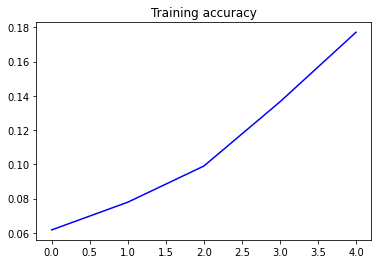

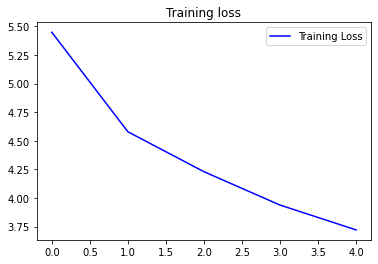

------------------------------
LSTM
I went to Shanghai out and his from and his and the from from and his and the from the the from the from ball from and and and the from boys the from the from ball boys the from the from ball from from boys from boys boys from the and the the from boys the from the from boys boys the from the from ball from from boys from boys boys boys the the the from boys boys from boys from boys boys myself boys boys from boys boys boys boys boys boys boys myself boys the and the the from boys the from the from boys boys the from the from boys from from boys from boys boys boys the the the from boys boys from boys from boys boys myself boys boys from boys boys boys boys boys boys boys myself boys boys the from from boys boys from boys from boys boys myself boys boys boys boys boys boys boys boys boys boys myself myself boys from from boys myself myself boys myself boys boys myself the boys boys boys boys myself myself myself myself myself myself the the and and a

In [27]:
model = build_model(LSTM(units, return_sequences=True, stateful=True))
predict_with_model("LSTM", 
                    model,
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            148480    
_________________________________________________________________
lstm_1 (LSTM)                (1, None, 64)             49408     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 300,294
Trainable params: 300,294
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
507/507 [==============================] - 8s 8ms/step - loss: 5.6003 - accuracy: 0.0644
Epoch 2/5
50

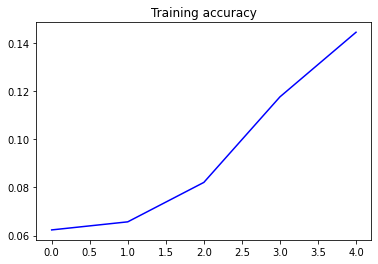

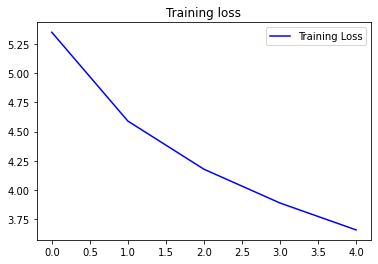

------------------------------
Bi-LSTM
I went to Shanghai up up the up up up got the up up up up they the up got got got and up and up up up got the up got got got and up got got got got and up got lanigans got and up and the up up up they the up got got got and up got got got got and up got lanigans got and up and up they got they and up lanigans lanigans got and up got lanigans lanigans got and up they lanigans lanigans the up and the up up up up got the up got got got and up got got got got and up got lanigans got and up and up got got got and up lanigans lanigans got and up got lanigans lanigans got and up they lanigans lanigans the up and the up got got got and up got lanigans got and up they lanigans lanigans lanigans and up lanigans lanigans lanigans the up and up got lanigans got and up got lanigans lanigans and up up got lanigans lanigans and up up got lanigans and up and the up the up up up got the up got got got and up got got got got and up got lanigans got and up and up go

In [28]:
model = build_model(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True))
predict_with_model("Bi-LSTM", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            148480    
_________________________________________________________________
bidirectional_1 (Bidirection (1, None, 128)            98816     
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 64)             49408     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 399,110
Trainable params: 399,110
Non-trainable params: 0
__________________________________________________

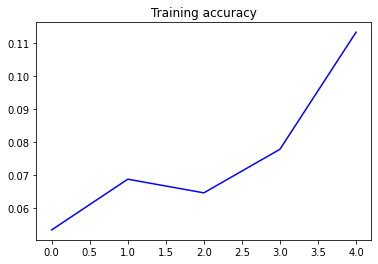

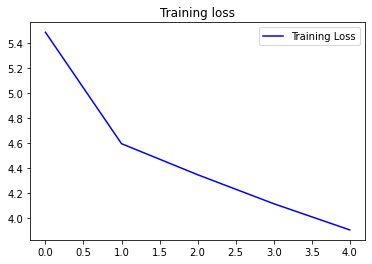

------------------------------
2 X Bi-LSTM
I went to Shanghai his his his his his his they they his his his his they they his his his his his his his his his his they they his his his his his his his they his his his his his they his his his his his his his his they they his his his his his his his they his his his his his they his his his his his his his his his his his they they his his his his his his they they his his his his they they his his his his his they they his his his his his his his they his his his his his they his his his his his his his his his his his they his his his his his his his they they his his his his they they his his his his his his his his they his his his his his his his they they his his his his they they his his his his his his his his his his his they his his his his his his his they his his his his his they his his his they they his his his his his his his they his his his his his they his his his his his his his his his his his they his his his his hi

In [29]:
model = build_model(Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    Bidirectional(LSTM(units, return_sequences=True, stateful=True)),
    LSTM(units, return_sequences=True,))
predict_with_model("2 X Bi-LSTM", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
gru (GRU)                    (1, None, 64)             55872     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 158,278
Trainable params: 158,278
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
507/507 [==============================] - 3s 3ms/step - loss: 5.5869 - accuracy: 0.0910
Epoch 2/5
507/507 [==============================] - 2s 3ms/step - loss: 4.4850 - accuracy: 0.0757
Epoch 3/5
507/507 [==========================

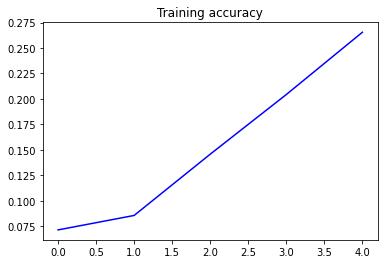

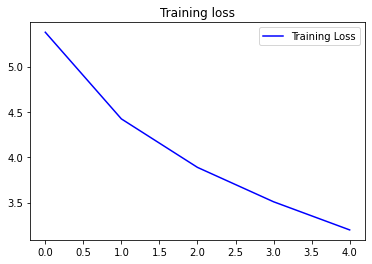

------------------------------
GRU
I went to Shanghai up all his up all his his the soon up all his his in soon his in soon soon soon old up all his his in bellows his in soon soon soon old his in girls his his was introduction his soon was was was up all his his the soon his the soon soon soon old his in girls his his was introduction his soon was was was his the bellows soon his soon soon his soon old old in he his was his introduction near and his the the the the casey his his his the soon his round soon soon soon old all in girls his his was introduction his soon was was was his the bellows soon his soon soon his soon old old in he his was his introduction near and his the the the the his the soon soon soon dancing soon girls old girls them stepped leg his was his introduction near and his the the the the hullabaloo soon the old soon old them miss in out leg his from introduction strangled soon and his up soon soon soon soon soon soon all his his round soon his round soon soon soon

In [30]:
model = build_model(GRU(units, return_sequences=True, stateful=True))
predict_with_model("GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            111744    
_________________________________________________________________
gru_1 (GRU)                  (1, None, 64)             37248     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 251,398
Trainable params: 251,398
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
507/507 [==============================] - 7s 8ms/step - loss: 5.6088 - accuracy: 0.0699
Epoch 2/5
50

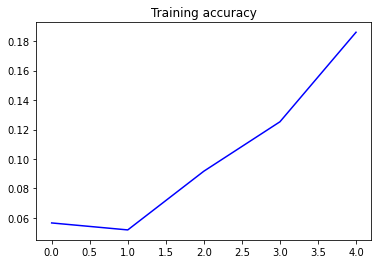

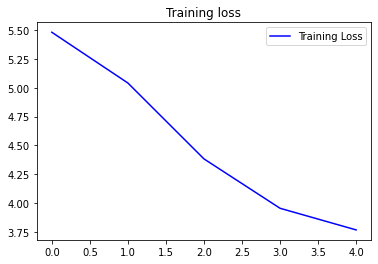

------------------------------
Bi-GRU
I went to Shanghai all got all got they they all all the got got all all all they a they they they the they got got all all all they a they they they the all all all all they they they they they they they they they got got all all all all a they they they the all all all all all they a they they they they they they all all all all they a they they they they got they they they they they they they they they they they they they got got all all all all a they they they the all all all all all they a they they they they they they all all all all they a they they they they got they they all they they they they they they they they they they all all all all all the got they they they got they they they all they a they they they they they they they they they got they they they they they they they they they they they they they they they they they they they they they got got all all all all a they they they the all all all all all they a they they they they t

In [31]:
model = build_model(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))
predict_with_model("Bi-GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (1, None, 225)            59175     
_________________________________________________________________
bidirectional (Bidirectional (1, None, 128)            111744    
_________________________________________________________________
bidirectional_1 (Bidirection (1, None, 128)            74496     
_________________________________________________________________
gru_2 (GRU)                  (1, None, 64)             37248     
_________________________________________________________________
dense (Dense)                (1, None, 131)            8515      
_________________________________________________________________
dense_1 (Dense)              (1, None, 263)            34716     
Total params: 325,894
Trainable params: 325,894
Non-trainable params: 0
__________________________________________________

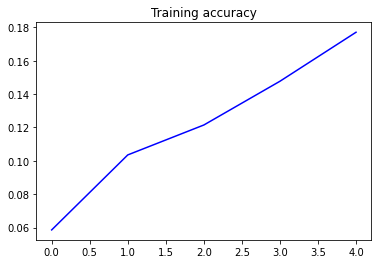

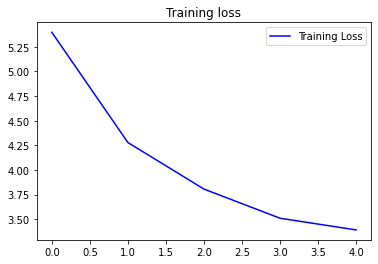

KeyboardInterrupt: 

In [32]:
model = build_model(Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    Bidirectional(GRU(units, return_sequences=True, stateful=True)),
    GRU(units, return_sequences=True))
predict_with_model("2 X Bi-GRU", 
                    model,                    
                    start_words="I went to Shanghai",
                    next_words=10)
